In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# load the dataset
# 1. Load and Prepare Data
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

x_train, x_test ,y_train , y_test = train_test_split(X,y,test_size=0.2 ,random_state=42)

In [7]:
# scalling 
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
# apply model
ols = LinearRegression()
ols.fit(x_train_scaled , y_train)
ols.predict(x_test_scaled)

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251], shape=(4128,))

In [16]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=50.0)        # create model
ridge.fit(x_train_scaled, y_train)   # train model
ridge_pred = ridge.predict(x_test_scaled)  # make predictions


Performance Comparison:
------------------------------
OLS MSE: 0.55589
OLS R2: 0.57579
Ridge MSE: 0.55433
Ridge R2: 0.57698


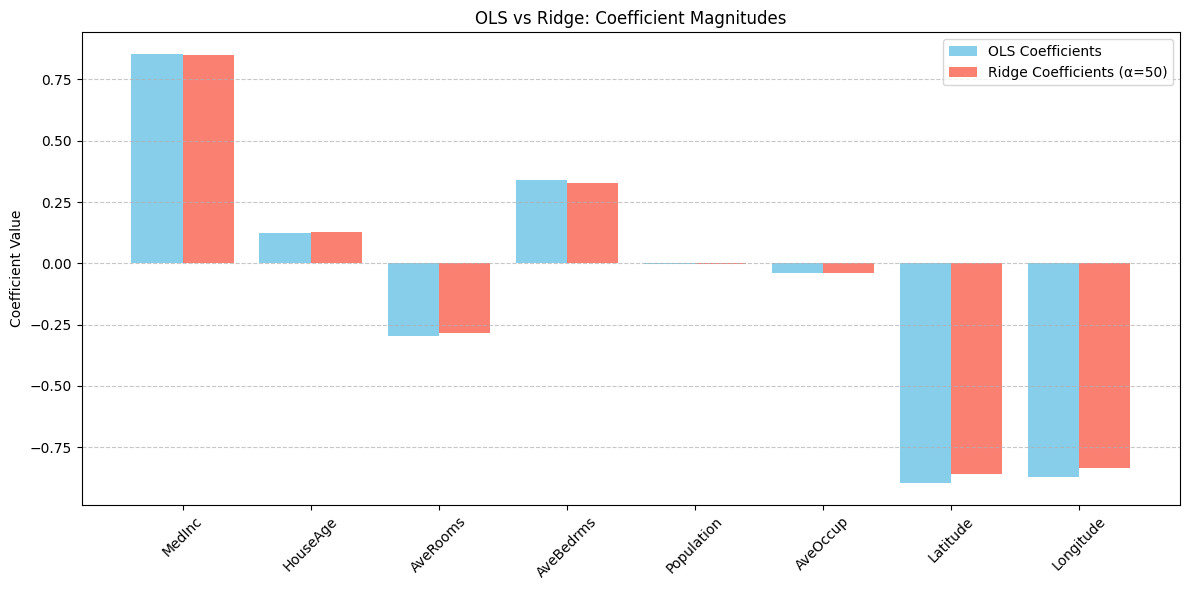

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load and Prepare Data
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Scaling (Essential!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Train Linear Regression (OLS)
ols = LinearRegression()
ols.fit(X_train_scaled, y_train)
ols_pred = ols.predict(X_test_scaled)

# 4. Train Ridge Regression
# We'll use alpha=50 to make the difference very visible
ridge = Ridge(alpha=50.0)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)

# --- RESULTS COMPARISON ---

def get_metrics(y_true, y_pred, name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {f"{name} MSE": mse, f"{name} R2": r2}

# Print Performance Metrics
print("Performance Comparison:")
print("-" * 30)
ols_m = get_metrics(y_test, ols_pred, "OLS")
rid_m = get_metrics(y_test, ridge_pred, "Ridge")
for k, v in {**ols_m, **rid_m}.items():
    print(f"{k}: {v:.5f}")

# 5. Visualize Coefficient Comparison
plt.figure(figsize=(12, 6))
x_axis = np.arange(len(data.feature_names))

plt.bar(x_axis - 0.2, ols.coef_, 0.4, label='OLS Coefficients', color='skyblue')
plt.bar(x_axis + 0.2, ridge.coef_, 0.4, label='Ridge Coefficients (α=50)', color='salmon')

plt.xticks(x_axis, data.feature_names, rotation=45)
plt.ylabel('Coefficient Value')
plt.title('OLS vs Ridge: Coefficient Magnitudes')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()